# **<center>Bezier-Kurven</center>**
<center>von Andreas Hager und Manuel Schmidbauer</center>

In diesem folgenden Dokument werden die mathematischen Attribute der Quadratischen und der Kubischen Bezier Kurve aufgezeigt und grafisch dargestellt.

# Herangehensweise

## Vorkenntnisse

- Vorheriges arbeiten mit Vektorgrafiken  
    => Es bestand bereits vorher ein Grundverständnis für die Funktionsweise von Bezier-Kurven.

## Lernziele

- Mathematische Modellierung von Bezier-Kurven  
- Praktischer Umgang mit SageMath, verstärkt der Umgang mit Vektoren und Grafischen Ausgaben  

## Selbstlernphase

- Lesen des Artikels über Bezier-Kurven im Rundbrief zur Computeralgebra, welcher im April 2008 unter dem untenstehenden Link erschienen ist.
- Weitergehend skizzieren der mathematischen Zusammenhänge einer Bezier-Kurve

# Inhaltsverzeichnis

[Aufgabe 1](#Aufgabe-1:)  
[Aufgabe 2](#Aufgabe-2:)  
[Aufgabe 3](#Aufgabe-3:)  
[Aufgabe 4](#Aufgabe-4:)  
[Aufgabe 5](#Aufgabe-5:)  
[Aufgabe 6](#Aufgabe-6:)  
[Aufgabe 7](#Aufgabe-7:)  
[Aufgabe 8 und 9](#Aufgabe-8-und-9:)

## Aufgabe 1:
Manuel Schmidbauer

Vorerst wurde eine QuadraticBezier Klasse implementiert, welche die gewünschte Funktion für die Kurve aufstellt und die nötigen Plots bereitstellt.
Die verwendeten Formeln wurden von der Grundidee aus http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (S. 11) entnommen und zusammen in eine Kurvenformel gepackt.

Hierfür wurden die Kontrollpunkte A, B und C gewählt.  
Der Punkt D entsteht durch das multiplizieren des Vektors DE mit t und anschließender Addition auf den Punkt A.  
Der Punkt E entsteht ähnlich, nur das der Vektor BC hergenommen wird.  
Um nun den Kurvenpunkt F zu erhalten wird das gleiche mit dem Vektor DE wiederholt, welcher anschließend in Abhänhigkeit von t vorliegt.

In [1]:
class QuadraticBezier:
    """
    Implementation of a quadratic bezier curve
    :author Manuel Schmidbauer:
    """
    
    def __init__(self, A, B, C):
        """
        Creates a new quadratic bezier curve
        :param A: vector representing the start point
        :param B: vector representing the control point
        :param C: vector representing the end point
        """
        t = var('t')
        
        self.A = A
        self.B = B
        self.C = C
        
        # Functions for the points D and E
        D = A + t*(B - A)
        E = B + t*(C - B)
        
        # Function for the final curve
        self.curve = D + t * (E - D)
    
    def get_plot(self):
        """Returns a 3xtuple containing the curve_plot, points_plot and lines_plot"""
        curve_plot = parametric_plot((self.curve[0], self.curve[1]), 
                                     (0, 1),
                                     color='blue',
                                     thickness=2,
                                     zorder=0)
        points_plot = points([self.A, self.B, self.C], 
                             size=50,
                             color='red',
                             zorder=2)
        lines_plot = line([self.A, self.B, self.B, self.C], 
                          color='green',
                          zorder=1)    
        return curve_plot, points_plot, lines_plot

Zudem ein kleines Testprogramm

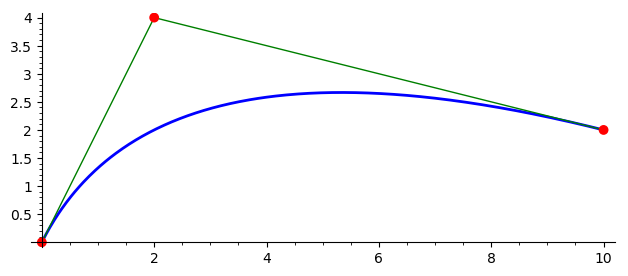

In [2]:
curve = QuadraticBezier(vector([0, 0]), vector([2, 4]), vector([10, 2]))
plots = curve.get_plot()
show(plots[0] + plots[1] + plots[2])

## Aufgabe 2:  
Andreas Hager

Hier soll die obige Konstruktion auf kubische Bezierkurven erweitert werden.  
Die Konstruktionsidee und die Grundlage der grafischen Darstellung habe ich aus dem Abschnitt "Kubische Bezierkurven (n=3)" des Artikels "Bezierkurve" unter https://de.wikipedia.org/wiki/B%C3%A9zierkurve#B%C3%A9zierkurven_bis_zum_dritten_Grad entnommen.  
Für die Form des Algorithmus habe ich die Quelle http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (2008, S. 9-11) zu Rate gezogen.   

```
Seien A, B, C, D element RxR  
Strecken AB, BC, CD  
Sei E element RxR ein Punkt auf der Strecke AB  
Sei t element R  
Wähle t so das t = AE / AD  
      => t element [0, 1]  
Wähle F, G, H, I, J element RxR,  
    so dass gilt:  
       F = B + t*BC  
       G = C + t*CD  
       H = E + t*EF  
       I = F + t*FG  
       J = H + t*HI 
Der Punkt J wandert auf der Kurve.
```

In [3]:
class CubicBezier:
    """
    :author Andreas Hager:
    Diese Klasse repräsentiert eine Kubische Bezier-Kurve.
    """
    
    def __init__(self, a, b, c, d):
        """
        Initialisiert die kubische Bezier-Kurve.
        :param a: Vektor repräsentiert den Startpubkt, bei t=0.
                    Dieser Punkt liegt immer auf der Kurve.
        :param b: Vektor repräsentiert einen mittleren Kontrollpunkt.
                    Dieser muss nicht auf der Kurve liegen.
        :param c: Vektor repräsentiert den 2. mittleren Kontrollpunkt.
                    Dieser muss nicht auf der Kurve liegen.
        :param d: Vektor repräsentiert den Endpunkt, bei t=1.
                    Dieser Punkt liegt immer auf der Kurve.
        """
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
        # Variable, von der die Kurve abhängt.
        t = var('t')
        assume(t >= 0)
        assume(t <= 1)
        
        # Vektoren in abhängigkeit von t.
        self.e = self.a + t*(self.b - self.a)
        self.f = self.b + t*(self.c - self.b)
        self.g = self.c + t*(self.d - self.c)
        self.h = self.e + t*(self.f - self.e)
        self.i = self.f + t*(self.g - self.f)
        
        # Vektor dessen Verlauf für t=[0, 1] die Bezier-Kurve darstellt.
        self.j = self.h + t*(self.i - self.h)

    def get_points(self):
        """Getter für Fixpunkte."""
        return self.a, self.b, self.c, self.d
        
    def get_explicit_curve(self):
        """Gibt eine vollständig vereinfachte algebraische Darstellung der Kurve zurück."""
        self.j[0] = self.j[0].full_simplify()
        self.j[1] = self.j[1].full_simplify()
        return self.j
    
    def get_curve_point_by_t(self, current_t):
        """
        Gibt den Kurvenpunkt in Abhängigkeit von t zurück
        :param current_t: Den derzeitigen Wert von t zwischen 0 und 1
        """
        return self.j.substitute(t=current_t)
    
    def plot_curve(self, upTo=1):
        """
        Plottet den Graphen der Kurve.
        :param upTo: gibt an bis zu welchen t die Kurve geplottet werden soll. upTo >0 und upTo <= 1.
        """
        courve = self.get_explicit_curve()
        return parametric_plot((courve[0], courve[1]), (0, upTo), color='blue', thickness=2, zorder=0)
    
    def plot_fix_points(self):
        """
        Plottet die Fixpunkte.
        """
        return list_plot([self.a, self.b, self.c, self.d], size=50, color='red', zorder=2)
    
    def plot_base_lines(self):
        """
        Plottet die Strecken zwischen den Fixpunkten.
        """
        punkte = [self.a, self.b, self.c, self.d]
        plot = line([self.a, self.b], color='green', thickness=2, zorder=1)
        plot += line([self.b, self.c], color='green', thickness=2, zorder=1)
        plot += line([self.c, self.d], color='green', thickness=2, zorder=1)
        return plot
   
    def plot_variable_points(self, value_of_t):
        """
        Plottet die Variablen Punkte.
        :param value_of_t: wert den self.t annehmen soll. value_of_t >= 0 und value_of_t <= 1.
        """
        points = [self.e.substitute(t=value_of_t), 
                  self.f.substitute(t=value_of_t), 
                  self.g.substitute(t=value_of_t), 
                  self.h.substitute(t=value_of_t), 
                  self.i.substitute(t=value_of_t), 
                  self.j.substitute(t=value_of_t)]
        return list_plot(points, size=50, color='red', zorder=2)
    
    def plot_variable_lines(self, value_of_t):
        """
        Plottet die Variablen Strecken zwischen den variablen Punkten.
        :param value_of_t: wert den self.t annehmen soll. value_of_t >= 0 und value_of_t <= 1.
        """
        # Strecke EF
        EF = [(self.e.substitute(t=value_of_t)), (self.f.substitute(t=value_of_t))]
        plot = line(EF, color='green', thickness=1, zorder=1) 
        
        # Strecke FG
        FG = [(self.f.substitute(t=value_of_t)), (self.g.substitute(t=value_of_t))]
        plot += line(FG, color='green', thickness=1, zorder=1)
        
        # Strecke HI
        HI = [(self.h.substitute(t=value_of_t)), (self.i.substitute(t=value_of_t))]
        plot += line(HI, color='green', thickness=1, zorder=1)
        return plot    
    
    def get_full_plot(self):
        """Erzeugt einen Plot mit der Kurve, den Grundlinien und den Fixpunkten"""
        plot = self.plot_fix_points()
        plot += self.plot_base_lines()
        plot += self.plot_curve()
        return plot
    
    def get_animation(self, frames=30):
        """
        Erzeugt eine Animation der Konstruktion dieser Kurve.
        :param frames: Anzahl der Bilder in der Animation.
        """
        # Plot der Fixpunkte
        fix_points = self.plot_fix_points()
        # Plot der Strecken zwischen den Fixpunkten
        base_lines = self.plot_base_lines()
        # Erzeugt eine Liste von Plots.
        plots = [fix_points + base_lines + 
                self.plot_variable_points(value_of_t=counter/(frames)) + 
                self.plot_variable_lines(value_of_t=counter/(frames)) + 
                self.plot_curve(upTo=counter/(frames))
                for counter in range(1, frames+1)]
        animation = animate(plots)
        return animation

Kleines Tesprogramm, das alle Methoden der Klasse CubicBezier mit zufälligen Werten aufruft und visuell ausgibt.

(-9*t^3 + 12*t^2 - 3*t - 2, 37*t^3 - 69*t^2 + 33*t - 2)

((-2, -2), (-3, 9), (0, -3), (-2, -1))


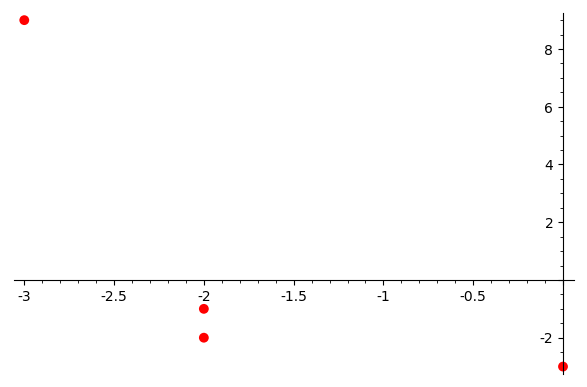

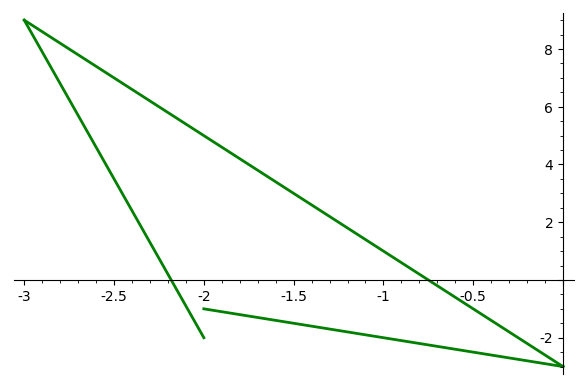

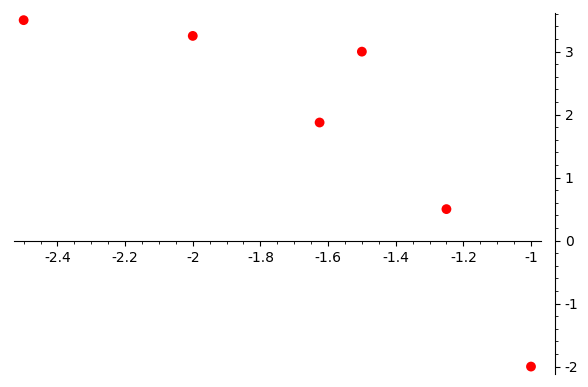

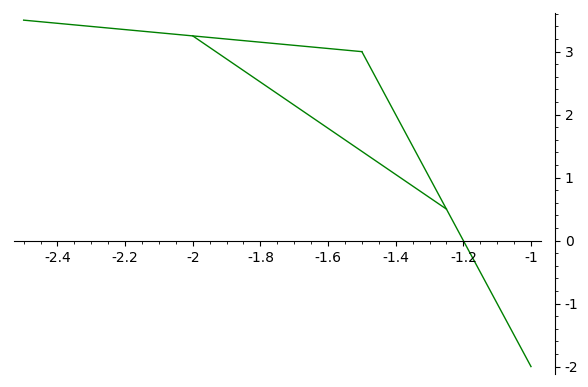

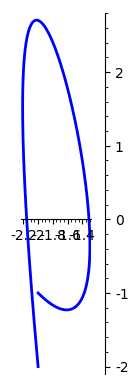

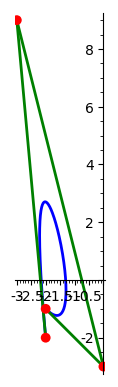

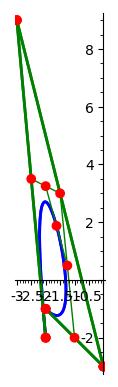

Animation with 20 frames
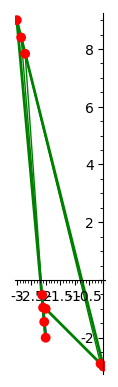

In [4]:
import random
a = vector([random.randrange(-10, 10), random.randrange(-10, 10)])
b = vector([random.randrange(-10, 10), random.randrange(-10, 10)])
c = vector([random.randrange(-10, 10), random.randrange(-10, 10)])
d = vector([random.randrange(-10, 10), random.randrange(-10, 10)])

# Erstellen eines neuen Objekts
sut = CubicBezier(a, b, c, d)

# Das tatsächliche Überprüfen erfolgt visuell, da sich so von einem menschen sehr leich überprüfen lässt.

pretty_print(sut.get_explicit_curve())

# Dies sind die erstellten Eckpunkte
print(sut.get_points())

# Die Linien liegen zwischen den Punkten
show(sut.plot_fix_points())
show(sut.plot_base_lines())

# Die Linien liegen zwischen den variablen Punkten
show(sut.plot_variable_points(value_of_t=0.5))
show(sut.plot_variable_lines(value_of_t=0.5))

# Die Punkte, Kurven und Geraden stimmen überein
show(sut.plot_curve())
show(sut.get_full_plot())

# Zeigt alles in einem Plot
show(sut.plot_fix_points() + sut.plot_fix_points() +
     sut.plot_base_lines() + 
     sut.plot_variable_points(value_of_t=0.5) + 
     sut.plot_variable_lines(value_of_t=0.5) + 
     sut.plot_curve() + sut.get_full_plot())

# Zeigt das Ganze in einer Animation.
show(sut.get_animation(20))

## Aufgabe 3:
Andreas Hager

Bei dieser Aufgabe ist eine Animation zu erstellen, welche ich an die Darstellung einer Bezier-Kurve in dem obengenannten Wikipedia-Artikel angelehnt habe.  
Dabei verwende ich die in meiner Klasser CubicBezier definierte Methode get_animation(frames).

Animation with 30 frames
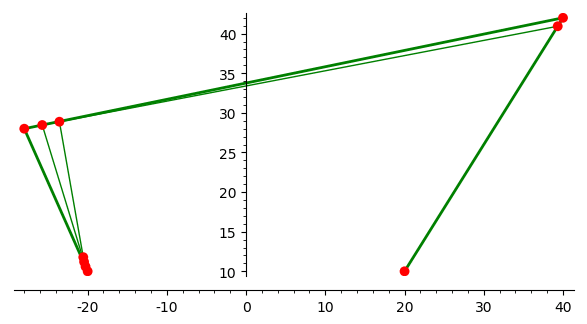

In [5]:
a = vector([-20, 10])
b = vector([-28, 28])
c = vector([40, 42])
d = vector([20, 10])

cubic = CubicBezier(a, b, c, d)

animation = cubic.get_animation(frames=30)
show(animation)
# animation.gif(savefile='bezier_animation.gif', delay=35, iterations=3)

## Aufgabe 4:
Andreas Hager

Bei dieser Aufgabe ist eine spezielle Kurve und deren Liniensegmente zu Plotten.
Des weiteren soll anhand dieser die Beziehung von der Kurve zu den beiden Mittleren Punkten zu zeigen.

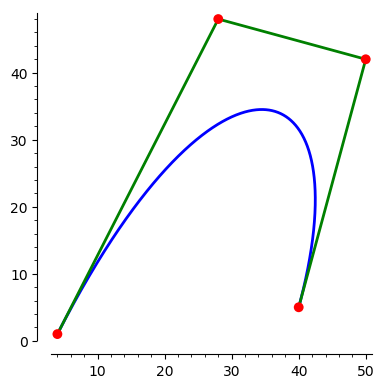

In [6]:
p1 = vector([4, 1])
p2 = vector([28, 48])
p3 = vector([50, 42])
p4 = vector([40, 5])

# Erstellen einer Kurve mit den Punkten P1, P2, P3 und P4
cubic = CubicBezier(p1, p2, p3, p4)

show(cubic.get_full_plot())

Die Punkte P2 und P3 krümmen die Kurve in ihre Richtung. Somit legt P2 fest mit welcher Steigung die Kurve von P1 in richtung P2 wandert. P3 legt fest mit welcher Steigung die Kurve in den Punkt P4 geht. (Siehe Beweis in Aufgabe 5)

## Aufgabe 5:
Andreas Hager

Bei dieser Teilaufgabe ist zu beweisen, dass die Tangente in P1 durch P2 geht und die Tangente in P4 durch P3 geht.

In [7]:
# Aufstellen einer algemeinen kubischen Bezier-Kurve,
# mit den Punkten P1, P2, P3, P4, welche durch die Vektoren p1, p2, p3, p4
# dargestellt werden.
p1x, p2x, p3x, p4x = var('p1x, p2x, p3x, p4x')
p1y, p2y, p3y, p4y = var('p1y, p2y, p3y, p4y')
p1 = vector([p1x, p1y])
p2 = vector([p2x, p2y])
p3 = vector([p3x, p3y])
p4 = vector([p4x, p4y])
cubic = CubicBezier(p1, p2, p3, p4)

# Allgemeine algebraische darstellung der Kurve
curve = cubic.get_explicit_curve()

# Ableitund der Kurve
d_curve = diff(curve, t)

# Einsetzen des wertes 0 in die Ableitung 
# => wir haben den Steigungsvektor an dem Punkt P1
d_curve_at_t0 = d_curve.substitute(t=0)

# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvektor
# ein vielfaches der Strecke P1P2 = P2 - P1 ist. In diesem Fall das dreifache, 
# da das der Grad der Funktion ist.
string_statement = "GEHT" if d_curve_at_t0 == 3*(p2 - p1) else "GEHT NICHT"
print("Die Tangente in P1 {} durch den Punkt P2".format(string_statement)) 
# => Die Kurventangente in P1 geht durch P2

# Einsetzen des Wertes 1 in die Ableitung 
# => wir haben den Steigungsvektor an dem Punkt p4
d_curve_at_t1 = d_curve.substitute(t=1)

# mit dieser logischen Gleichheit ist gezeigt, dass der Steigungsvektor
# ein vielfaches der Strecke P3P4 = P4 - P3 ist.
string_statement = "GEHT" if d_curve_at_t1 == 3*(p4 - p3) else "GEHT NICHT"
print("Die Tangente in P4 {} durch den Punkt P3".format(string_statement))
# => Die Kurventangente in P4 geht durch P3

Die Tangente in P1 GEHT durch den Punkt P2
Die Tangente in P4 GEHT durch den Punkt P3


# Aufgabe 6:
Manuel Schmidbauer

Bei der Aufgabe 6 sollte ein C mit hilfe von einer Bezier Kurve erstellt werden.
Hierfür wurden die Punkte:
A = (3,-5)
B = (-3,-5)
C = (-3, 5)
D = (3, 5)
gewählt, um eine schönes C zu erschaffen, welches sich um den Koordiantenursprung bildet.

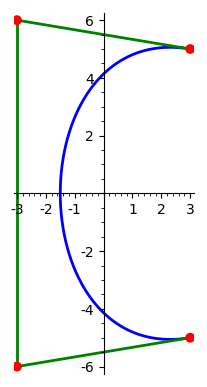

In [8]:
c = CubicBezier(vector([3, -5]), vector([-3, -6]), vector([-3, 6]), vector([3, 5]))
show(c.get_full_plot())

## Aufgabe 7:
Manuel Schmidbauer

Um einen glatten Übergang zwischen zwei Bezierkurven zu erschaffen muss die Steigung der beiden Funktionen am Übergangspunkt gleich sein. Um dies sicherzustellen müssen spezielle Bedingungen für die Kontrollpunkte bestehen.  
Man nehme an, die beiden Kurven bestehen aus den Kontrollpunkten A, B, C, D und E, F, G, wobei der Punkt D der Übergangspunkt ist und somit in beiden Kurven enthalten ist.  
Dann muss für die Punkte C, D, E gelten, dass jeweils die Vektoren CD und DE die gleiche Steigung haben, was bedeutet das sie auf einer Geraden liegen.

In [9]:
def get_gradient_at_t(cubic, current_t):
    """
    Calculates the gradient at the given point current_t using the limit function
    :param cubic: a CubicBezier object
    :param current_t: a value between 0 and 1 
    """
    function = cubic.get_explicit_curve()
    diff = function[1] / function[0]
    return limit(diff, t=current_t)

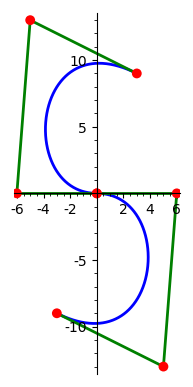

The gradient at the transition is THE SAME


In [10]:
A = vector([3, 9])
B = vector([-5, 13])
C = vector([-6, 0])
D = vector([0, 0])
E = vector([6, 0])
F = vector([5, -13])
G = vector([-3, -9])

# Creating two CubicBezier Curves with the shared point D
upper_curve = CubicBezier(A, B, C, D)
lower_curve = CubicBezier(D, E, F, G)

# Printing the curves
show(upper_curve.get_full_plot() + lower_curve.get_full_plot())

# Checking if the to have the same gradient at the transition
same_gradient = bool(get_gradient_at_t(upper_curve, 1) == get_gradient_at_t(lower_curve, 0))
same_statement = "THE SAME" if same_gradient else "NOT THE SAME"
print("The gradient at the transition is " + same_statement)

Hierbei ist es wichtig, das die Punkte A und G keinen Einfluss auf den Übergang haben!  
Um dies zu veranschaulichen werden im folgenden zwei zufällige plots erzeugt, deren Übergang im Punkt O(0, 0) glatt aneinander liegt.

The gradient at the transition is THE SAME


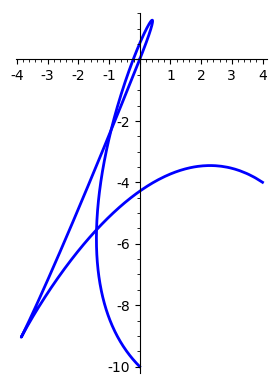

In [16]:
import random
def get_two_smoothe_curves():
    """Geneates two random cruves with a smoothe transition and returns the plot"""
    # The same example, but with random values for A, B, F, G and a random transition angle
    A = vector([random.randrange(-10, 10), random.randrange(-10, 10)])
    B = vector([random.randrange(-10, 10), random.randrange(-10, 10)])

    # CD is generated randomly and DE is mirrowed an sacled by a random value
    e_length = random.randrange(-5, -1)
    C = vector([random.randrange(1, 10), random.randrange(1, 10)])
    D = vector([0, 0])
    E = vector([C[0]*e_length, C[1]*e_length])
    
    F = vector([random.randrange(-10, 10), random.randrange(-10, 10)])
    G = vector([random.randrange(-10, 10), random.randrange(-10, 10)])

    # Creating two CubicBezier Curves with the shared point D
    upper_curve = CubicBezier(A, B, C, D)
    lower_curve = CubicBezier(D, E, F, G)

    # Checking if the to have the same gradient at the transition
    same_gradient = bool(get_gradient_at_t(upper_curve, 1) == get_gradient_at_t(lower_curve, 0))
    same_statement = "THE SAME" if same_gradient else "NOT THE SAME"
    print("The gradient at the transition is " + same_statement)
    
    return upper_curve.plot_curve() + lower_curve.plot_curve()

show(get_two_smoothe_curves())

## Aufgabe 8 und 9:
Manuel Schmidbauer

Nun sollen mehrere Kurven aneinander gefügt werden und somit ein schöner Weg aus Kurven entstehen. Hierzu wurde eine neue Klasse CubicBezierPath defeniert, welches solch einen Weg darstellt.  
Intern wird eine Liste aus CubicBezier Kurven gespeichert, welche jeweils gemeinsame Punkte haben und zusammen geplotted werden. Gemeinsam haben sie den Übergangspunkt D welcher durch einen neuen Punkt ergänzt wird. Dieser ist der negative Vektor DC addiert auf D, wodurch dieser Vektor um den Punkt D gespiegelt wird.

In [12]:
class CubicBezierPath:
    """A path of several cubic Bezier Curves with a smooth transition each"""
    
    def __init__(self, base_curve):
        """
        Creates a new path from a base curve
        :param base_curve: the base cubicBezier curve
        """
        self.cubic_curves = [base_curve]
        
    def add_points(self, new_points):
        """
        Adds a array of new points to the curve
        :param new_points: [(A,B), (C,D), ...] a list of 2er tuples
        """
        for new_point in new_points:
            # Get´s the last two points of the prvious curve
            C, D = self.cubic_curves[-1].get_points()[-2:]
            # Generates a new CubicBezier curve with the start point D and the mirrowed vector CD
            new_curve = CubicBezier(D, D - (C-D), new_point[0], new_point[1])
            self.cubic_curves.append(new_curve)
        
    def get_full_plot(self):
        """Creates a plot of every curve in the path"""
        # Just iterates throught every curve in the list and gets the plot
        # Takes the first one as a base
        return_plot = self.cubic_curves[0].get_full_plot()
        
        # Then checks whether there are more
        if len(self.cubic_curves) > 1:
            
            # If so simple adds them
            for cubic_curve in self.cubic_curves[1:]:
                return_plot += cubic_curve.get_full_plot()
        return return_plot
    
    def get_curve_point_by_t(self, current_t):
        """
        Returns the point in the path for the given t
        :param current_t: The t that the point should be returned, should be in a range of 0-1
        """
        assert 0 <= current_t < 1
        # First scales the t with the list length
        scaled_t = current_t * len(self.cubic_curves)
        # And then rounds the value to get the curve index
        curve_index = int(scaled_t)
        # And then substracts the index to get the current_curves t
        scaled_t -= curve_index
        
        # And then finally gets the function and the point
        current_curve = self.cubic_curves[curve_index]
        return current_curve.get_curve_point_by_t(scaled_t)

Zudem wird eine Funktion defeniert welche aus sechs gegeben Punkten eben solch einen Weg generiert.

In [13]:
def generate_path_from_6_points(A, B, C, D, E, F):
    """Generates a new CubicBezierPath from 6 points"""
    curve_path = CubicBezierPath(CubicBezier(A, B, C, D))
    curve_path.add_points([(E, F)])
    return curve_path

Im weiteren wird das oben bereits generierte S nun mit einem CubicBezierPath dargestellt.  
Zu diesem werden außerdem noch weiter Punkte addiert.

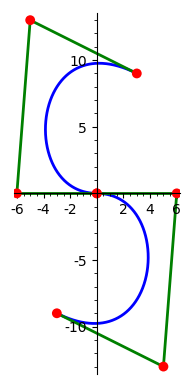

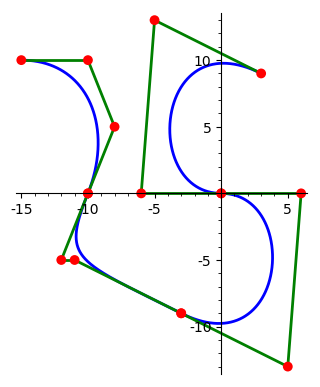

In [14]:
A = vector([3, 9])
B = vector([-5, 13])
C = vector([-6, 0])
D = vector([0, 0])

E = vector([5, -13])
F = vector([-3, -9])

# Creates the 'S' as a path of cubicBezierCurves
curve_path = generate_path_from_6_points(A, B, C, D, E, F)
show(curve_path.get_full_plot())

# Adds a additional test point
curve_path.add_points([(vector([-12, -5]), vector([-10, 0])), (vector([-10, 10]), vector([-15, 10]))])
curve_path.get_full_plot()

Zudem wird der ganze Weg noch als Punkte mithilfe eines Laufparameter t gezeichnet, welcher von 0 bis 1 in einem Abstand von 0.1 läuft.  
Hierfür wird eine float Generator Funktion benutzt welche eben solch eine Liste ausgibt.   
Als Beispiel wird der gleiche Weg wie in der vorrausgehenden Aufgabe genutzt!

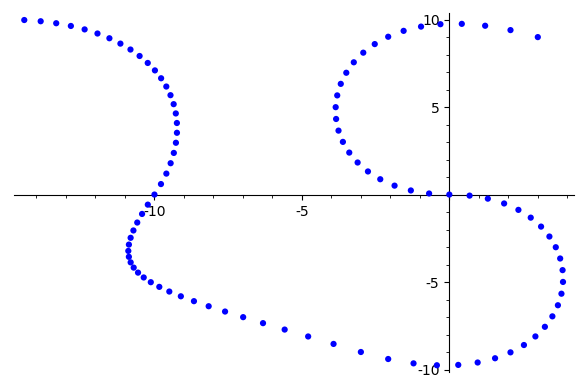

In [15]:
def float_range_generator(start, end, step):
    """Float range generator function that yield the given range with the given step"""
    while start < end:
        yield start
        start += step
        
# Generates the points
test_points = [curve_path.get_curve_point_by_t(t) for t in float_range_generator(0, 1, 0.01)]

# And then plots them
points_plot = list_plot(test_points, size=20, color='blue', zorder=3)
show(points_plot)